# Analyzing the GTSRB Data

In your last notebook, you learned how to read in the German Traffic Signs data and do all sorts of "fun" (kidding) pre-processing to work with this data. In this notebook, I'll do all that pre-processing for you, and we'll spend more time actually interpreting the data! 

Again, we'll use the function that the German Traffic Signs guys gave us to read in the data:

In [1]:
import matplotlib.pyplot as plt
import csv
import numpy as np
import cv2
from sklearn.model_selection import train_test_split

def readTrafficSigns(rootpath, test_set = 0):
    '''
    Reads traffic sign data for German Traffic Sign Recognition Benchmark.

    Input: path to the traffic sign data, for example './GTSRB/Training'
    Output:   list of images, list of corresponding labels
    '''
    
    # Initialize the lists to store images, labels: 
    images = [] # images
    labels = [] # corresponding labels
    
    # loop over all 42 classes
    for c in range(0,43):
        # The csv contains annotations for each image.
        # Path to csv file: 
        prefix = rootpath + '/' + format(c, '05d') + '/' # subdirectory for class
        gtFile = open(prefix + 'GT-'+ format(c, '05d') + '.csv') # annotations file

        
        # Open and start reading the lines of the csv file: 
        gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
        next(gtReader) # skip header
        
        # loop over all images in current annotations file
        for row in gtReader:
            # Add each image and label to their respective lists
            images.append(plt.imread(prefix + row[0])) # the 1th column is the filename
            labels.append(row[7]) # the 8th column is the label
        # Finally, close the csv file when we're done.
        gtFile.close()
        
    return images, labels

You need to give me two things from your last notebook:

1. Define the path to your images: 

In [28]:
my_path = './Training/Final_Training/Images' # Change this to whatever you had in the last notebook

2. Also, I'll need that function for processing your images (converting to grayscale, re-sizing, and expressing as a 1-D array). If you didn't get to that yet, I'll be around to help you. 

Recall: The function takes in the image as an input, and returns a 1-D array as output. 

In [3]:
# TODO: Fill in your image processing function here. I called mine "convert_image()"







Now, I'll re-do some of that pre-processing work for you. The function "make_data_array" will take in the data from the GTSRB function output, and then process it into the form that we want for models like the Logistic Regression model. 

In [4]:
# Using a function we wrote last time, but ALSO using your function to process the image: TODO!  
def find_images_by_label(X, y, label):
    """
    Inputs: Data matrices X and y, and desired label to match 
    Outputs: Desired subset of X and y matrices (with consistent formatting)
    """
    X_sub = []
    y_sub = []

    for i in range(len(y)):       
        if(int(y[i])==int(label)):
            X_sub.append(convert_image(X[i]))   # TODO! Use your image processing function name here. 
            y_sub.append(int(label))

    return X_sub, y_sub

In [5]:

def make_data_array(trainImages, trainLabels, label_list):
    """
    Inputs: training images/labels data, plus a list of labels we want to keep
    Outputs: train/test splits of reduced X, y matrices 
    """
    
    X_store, y_store = find_images_by_label(trainImages, trainLabels, label_list[0])
    
    for i in range(1, len(label_list)):
        X_temp, y_temp = find_images_by_label(trainImages, trainLabels, label_list[i])
               
        X_store = np.append(X_store, X_temp, axis=0)
        y_store = np.append(y_store, y_temp, axis=0)
    
    X_train, X_test, y_train, y_test = train_test_split(X_store, y_store, test_size=0.33, random_state=42)
    return X_train, y_train, X_test, y_test


In [29]:
trainImages, trainLabels = readTrafficSigns(my_path)
# To get all the labels: 
# index_list = range(0,len(np.unique(trainLabels)))
label_list = [12, 14]
X_train, y_train, X_test, y_test = make_data_array(trainImages, trainLabels, label_list)

Now, we can start training models with this!

Here is the logistic regression example from last time. 

In [10]:
from sklearn.linear_model import LogisticRegression

# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

predictions = logisticRegr.predict(X_test)
score = logisticRegr.score(X_test, y_test)
print(score)

0.997896950578


A real world example! Read in 'stop_princeton.png', display it, and use the Logistic Regression model to predict its class. 

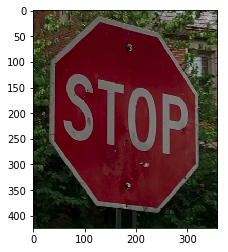

In [8]:
# TODO: Read in 'stop_princeton.png'
#stop_test = TODO

# TODO: Display the image
# Hint: if you're using Matplotlib's imshow, fix the colors like this:   stop_test[...,::-1]

# Helper code for doing the prediction: 
test_im = convert_image(stop_test)
test_im = test_im.reshape(1, -1)

# Now, predict!: 
# TODO: use your logistic regression model to predict on test_im. Print the predicted value.

## Interrogating the Model 

We want to see just how robust our model is to different types of changes. Read in another stop sign example (this one is a head-on view).

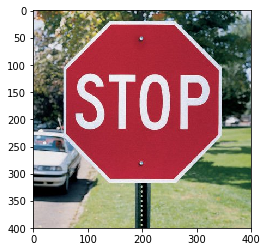

In [19]:
# TODO: Read in 'stop.jpg'

# TODO: display the image

# TODO: Make a new prediction on this image. 


Now let's see how we can mess with this image. I've put two different images in your folder. One contains only the word "STOP" cropped out of this sign on a red background, and the other contains the boundaries of the sign but no word. Does the model still handle these examples well? 

The images are called: 
    - 'stop_word.jpg'
    - 'stop_blank.jpg'

In [ ]:
# TODO: Test the two images given above. Does your model still classify them correctly? 












Probably, these actually did okay! We were lucky here because the two classes we're considering (12 and 14) are so different. We'll come back to interrogating the models, but first, let's get some new models to play with! 

## Supervised Learning with Sci-Kit Learn 

In your morning lectures, you learned about a bunch of different models for supervised learning. For instance, you learned:

    - Linear and logistic regression (we've already tried these a little bit),
    - Decision Trees,
    - k Nearest Neighbors,
    - Naive Bayes, and 
    - Neural Networks.
    
Your goal now is to choose three types of models and compare their performance on your training/test sets. 

**Step 1.** First, we're gonna need a more complicated dataset. It's boring trying to distinguish between only two classes, right? 

By re-using the code from above, we'll choose a few more classes. 

In [30]:
trainImages, trainLabels = readTrafficSigns(my_path)
# To get all the labels: 
# index_list = range(0,len(np.unique(trainLabels)))
label_list = [0, 5, 12, 14, 27]  # Change this if you want! 
X_train, y_train, X_test, y_test = make_data_array(trainImages, trainLabels, label_list)

**Step 2.** What does this dataset contain? Display some example images. 

[12 12  5 14  5 12 12  0  5  5  5 12 12  5  5 12  5 12  5  5  5  5  5 27 12
 12 12  5  5 14 12  5 12  5 12  5 12 14 12 12  5  5 12 12 12  5 12  0 27  5]


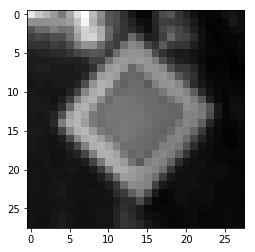

In [41]:
print(y_train[:50])

img = np.reshape(X_train[0], (28,28))
plt.imshow(img, cmap='gray')
plt.show()

**Step 3.** Fitting a Logistic Regression model as before, we get a slightly lower score. Why? 

In [43]:
from sklearn.linear_model import LogisticRegression

# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

predictions = logisticRegr.predict(X_test)
score = logisticRegr.score(X_test, y_test)
print(score)

0.968476357268


**Step 4.** Go back through your old notebooks, and try plotting the confusion matrix using "predictions". Where does the model get confused the most? 

In [ ]:
# TODO: Use old confusion matrix code here











**Step 5.** Choose two models that you've seen in class to make new predictions. Use the following link to help you:

http://scikit-learn.org/stable/supervised_learning.html

(Don't choose neural networks! We'll do that below.)

This site will lead you to all kinds of helpful documentation for using these models. Feel free to ask for help reading these! 

**Step 6.** Finally, we can try the neural networks! I'll demonstrate how to create a model here: 

In [44]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, y_train) 

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

Predict with this model: 

In [45]:
nn_predictions = clf.predict(X_test)

**Step 7.** Your job here is to play around with the neural network parameters, and try to get the highest accuracy score.

What did you change, and why do you think it might help? 

**Step 8.** Again, plot the confusion matrix for the neural network model.

## Analyzing the Models 

Here, we've left you a bit of space to allow you to probe these models. We offer suggestions at what to look at, but it's up to you to experiment and deeply understand the strengths and weaknesses of each model. For example...: 

1. First of all, what's this data we're working with? How many examples do we have in each class? Try to figure this out. Are there any other class statistics you can find? 

In [ ]:
# Hint: you can use something like this:
# unique, counts = numpy.unique(a, return_counts=True)




2. Compare the accuracy of the models you tried. Do some struggle where others succeed? Try to explain any differences. Which classes get confused the most? Why? 

3. Choose an image to alter, as we did earlier with the stop sign. Can you make the classifier fail? If you include more classes, will the classifier fail more readily on your altered images? Try to figure out what features each algorithm is learning.

4. Freely play around with model parameters. What seems to cause improvements? What really hurts your models? Why? 

5. Any other tests you want to try: 

**Finally,** you can try training the models on *all* the classes in the training set. Give it a go! How well do your models do? Where do they fail?

**Challenge #1:** Not every class has the same number of examples. Try to plot the accuracy of predictions in each class by the number of examples in that class. 

**Challenge #2:** What if we include color information? How much does this help (or hurt) your classifier? 

Note: you'll have to make a modifed function to process your images now. 

## Supplementary Material: HOG Features and Pedestrian Detection 

We talked a little bit about HoG descriptors at the start of the lecture.

The following code demonstrates how HoG descriptors can be used for pedestrian detection.

This function takes an image as input and returns the bounding box of a pedestrian:

In [59]:
def HogDescriptor(image):
        """
        Input: an image, resized to have max width = 400 pixels
        Output: rects, giving the bounding box rectangle around the pedestrian as (x, y, width, height)
        """
        hog = cv2.HOGDescriptor()
        hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
        (rects, weights) = hog.detectMultiScale(image, winStride=(5,5),padding=(16,16), scale=1.05, useMeanshiftGrouping=False)
        return rects 

Now, to choose an image and test the function:

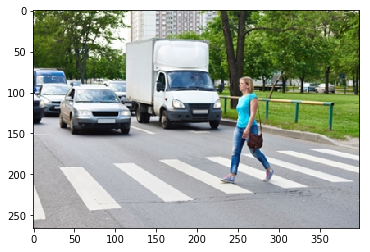

In [60]:
import imutils

test_pedes = cv2.imread('pedestrian.jpg')
image = cv2.imread('pedestrian.jpg')
image = imutils.resize(image, width=min(400, image.shape[1]))
plt.imshow(test_pedes[...,::-1])
plt.show()

In [68]:
[[x, y, w, h]] = HogDescriptor(image)
print(rects)

[[220  63  83 165]]


Plotting the result: 

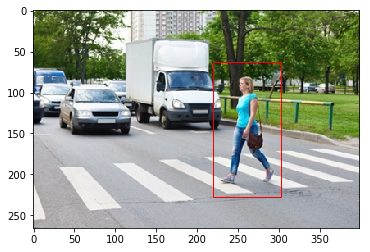

In [76]:
import matplotlib.patches as patches

fig,ax = plt.subplots(1)
ax.imshow(test_pedes[...,::-1])
rect = patches.Rectangle((x,y),w,h,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)

plt.show()

Try to test your own image by following the steps above.

Note that the GTSRB dataset also has HoG descriptors available for download. It's possible to train a classifier using these descriptors rather than the raw data. You would get improved accuracy results! 